# word2vec

## wczytanie modelu

In [1]:
from gensim.models.word2vec import Word2Vec

model_fname = 'model'

model = Word2Vec.load(model_fname)
wv = model.wv

## wyrażenia podobne

In [2]:
wv.most_similar(positive=['sąd_najwyższy'], topn=3)

[('sad_najwyższy', 0.789208173751831),
 ('trybunał_konstytucyjny', 0.7582725286483765),
 ('sn', 0.6780577301979065)]

In [3]:
wv.most_similar(positive=['trybunał_konstytucyjny'], topn=3)

[('trybunał', 0.8216362595558167),
 ('sąd_najwyższy', 0.7582725286483765),
 ('sad_najwyższy', 0.715900719165802)]

In [4]:
wv.most_similar(positive=['kodeks_cywilny'], topn=3)

[('prawo_wekslowe', 0.6383090615272522),
 ('kodeks_karny', 0.6356019973754883),
 ('kodeks_pracy', 0.6007641553878784)]

In [5]:
wv.most_similar(positive=['kpk'], topn=3)

[('pkt_kpk', 0.8201305270195007),
 ('kpw', 0.766355037689209),
 ('kpc', 0.7400600910186768)]

In [6]:
wv.most_similar(positive=['sąd_rejonowy'], topn=3)

[('sad_rejonowy', 0.8811819553375244),
 ('sąd_okręgowy', 0.8413026332855225),
 ('sąd_meriti', 0.8029004335403442)]

In [7]:
wv.most_similar(positive=['szkoda'], topn=3)

[('szkoda_ta', 0.7643934488296509),
 ('szkoda_majątkowa', 0.7148711085319519),
 ('wysokość_szkody', 0.676495373249054)]

In [8]:
wv.most_similar(positive=['wypadek'], topn=3)

[('przedmiotowy_wypadek', 0.5403644442558289),
 ('wypadek_komunikacyjny', 0.5200176239013672),
 ('skutek', 0.4973249137401581)]

In [9]:
wv.most_similar(positive=['kolizja'], topn=3)

[('kolizja_drogowa', 0.7340992093086243),
 ('awaria', 0.7187645435333252),
 ('usterka', 0.6854398250579834)]

In [10]:
wv.most_similar(positive=['szkoda_majątkowa'], topn=3)

[('szkoda_ta', 0.746087908744812),
 ('szkoda', 0.7148711085319519),
 ('krzywda', 0.6924257278442383)]

In [11]:
wv.most_similar(positive=['nieszczęście'], topn=3)

[('trujące', 0.6113100051879883),
 ('szczęściem', 0.6112188100814819),
 ('upojenie', 0.6094433665275574)]

In [12]:
wv.most_similar(positive=['rozwód'], topn=3)

[('separację', 0.7108328342437744),
 ('rozwiązanie_małżeństwa', 0.678260326385498),
 ('orzeczenie_rozwodu', 0.628940224647522)]

## operacje na słowach

In [13]:
wv.most_similar(positive=['sąd_najwyższy', 'konstytucja'], negative=['kpc'], topn=5)

[('trybunał', 0.6149224042892456),
 ('trybunał_konstytucyjny', 0.6113895177841187),
 ('trybunał_sprawiedliwości', 0.5570698976516724),
 ('sad_najwyższy', 0.5439829230308533),
 ('ustawodawca', 0.5199770927429199)]

In [14]:
wv.most_similar(positive=['pasażer', 'kobieta'], negative=['mężczyzna'], topn=5)

[('pasażerka', 0.7437127828598022),
 ('piesza', 0.7306684851646423),
 ('kierująca', 0.717907726764679),
 ('rowerzystka', 0.673485517501831),
 ('kierująca_pojazdem', 0.6565858125686646)]

In [15]:
wv.most_similar(positive=['samochód', 'rzeka'], negative=['droga'], topn=5)

[('skuter', 0.6853002309799194),
 ('rower', 0.63478022813797),
 ('samochód_marki', 0.6301491260528564),
 ('pojazd', 0.6274740695953369),
 ('laptop', 0.6248205900192261)]

## projekcja wektorów na płaszczyznę

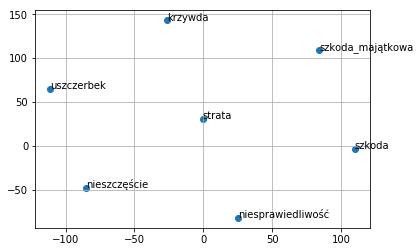

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

words = ['szkoda',
         'strata',
         'uszczerbek',
         'szkoda_majątkowa',
         'krzywda',
         'niesprawiedliwość',
         'nieszczęście']

vectors = [wv[word] for word in words]
vecs_embedded = TSNE(n_components=2).fit_transform(vectors)

fig, ax = plt.subplots()
x, y = zip(*vecs_embedded)
ax.scatter(x, y)
for i, txt in enumerate(words):
    ax.annotate(txt, (x[i],y[i]))

ax.grid()
plt.show()